# <span style='color:red '>Hierarchical Clustering</span>

## <span style='color:red '>1.0 Importing required libraries</span>

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

import scipy.cluster.hierarchy as hc

import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## <span style='color:red '>2.0 Importing customer dataset for clustering </span>

In [2]:
dataset=pd.read_csv('segmented_customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3


In [3]:
data=dataset.iloc[:,3:5]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### <span style='color:red '>2.1 Plotting dendogram for deciding number of cluster </span>

**From below dendogram it is clearly visible that there will be 5 clusters as when we draw a line parallel to X axis at Y= 150, it cuts 5 vertical lines.**

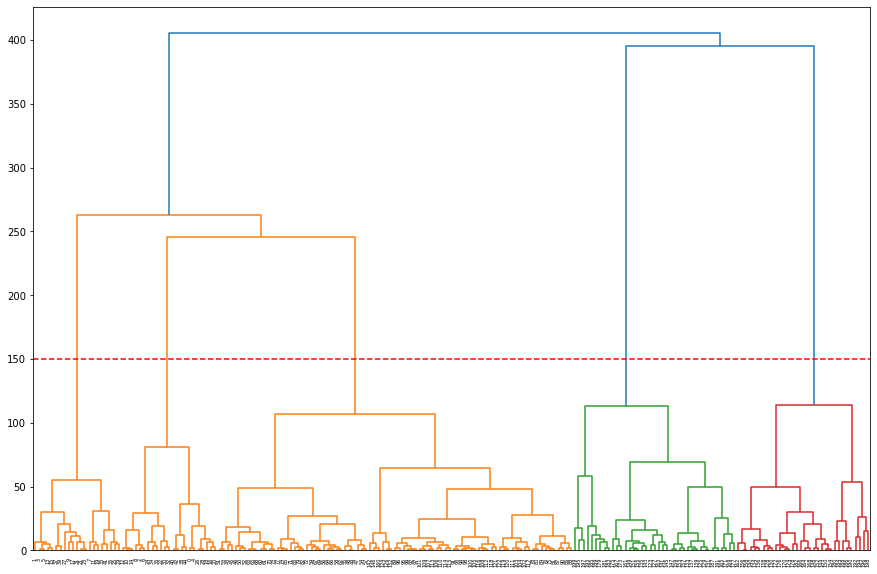

In [5]:
plt.figure(figsize=(15,10))
hc.dendrogram(hc.linkage(data, method='ward'))
plt.axhline(y=150, color='r', linestyle='--')
plt.show();

### <span style='color:red '>2.2 Clustering the data</span>

In [6]:
agg_cluster= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels_= agg_cluster.fit_predict(data)
labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

### <span style='color:red '>2.3 Visualizing the clustered data</span>

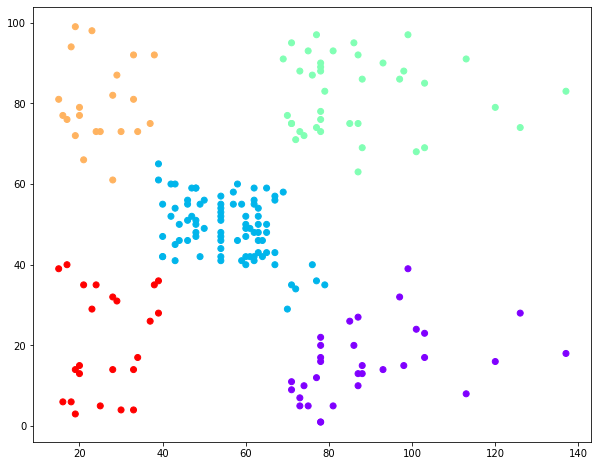

In [7]:
plt.figure(figsize=(10,8))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=agg_cluster.labels_,  cmap='rainbow')

## <span style='color:red '>3.0 Importing World Countries dataset for clustering </span>

In [140]:
data1= pd.read_csv('countries of the world.csv')
data1.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


### <span style='color:red '>3.1 Data Cleaning</span>

In [141]:
### getting count of unique values in each feature
for feature in data1.columns:
    print(f"The [{feature}] and has [{data1[feature].nunique()}] no. of unique values")

The [Country] and has [227] no. of unique values
The [Region] and has [11] no. of unique values
The [Population] and has [227] no. of unique values
The [Area (sq. mi.)] and has [226] no. of unique values
The [Pop. Density (per sq. mi.)] and has [219] no. of unique values
The [Coastline (coast/area ratio)] and has [151] no. of unique values
The [Net migration] and has [157] no. of unique values
The [Infant mortality (per 1000 births)] and has [220] no. of unique values
The [GDP ($ per capita)] and has [130] no. of unique values
The [Literacy (%)] and has [140] no. of unique values
The [Phones (per 1000)] and has [214] no. of unique values
The [Arable (%)] and has [203] no. of unique values
The [Crops (%)] and has [162] no. of unique values
The [Other (%)] and has [209] no. of unique values
The [Climate] and has [6] no. of unique values
The [Birthrate] and has [220] no. of unique values
The [Deathrate] and has [201] no. of unique values
The [Agriculture] and has [150] no. of unique value

In [142]:
### replacing ',' with '.' in features 
for feature in [feature for feature in data1.columns if data1[feature].dtypes=='O']:
    try:
        data1[feature]=data1[feature].str.replace(',','.')
    except:
        pass

In [143]:
### getting no of columns and rows in dataset
print(f"Data set has {data1.shape[1]} no. of columns and {data1.shape[0]} no. of rows")

Data set has 20 no. of columns and 227 no. of rows


In [144]:
### creating label encoding object
encoder=LabelEncoder()
encoder

LabelEncoder()

In [145]:
### getting datatypes
data1.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [146]:
### converting numerical data to numeric datatypes
for feature in data1.columns:
    if data1[feature].dtypes in ['int64', 'float64']:
        pass
    else:
        try:
            data1[feature]=data1[feature].astype('float64')
        except:
            pass

In [147]:
### checking datatypes
data1.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

In [149]:
### label encoding the categorical features
data1 = data1.apply(encoder.fit_transform)

In [152]:
### getting top 5 rows
data1.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,0,189,185,75,0,156,218,2,4,6,109,15,116,0,216,190,131,53,26
1,1,3,98,84,138,52,17,111,34,81,65,152,103,60,4,74,35,104,31,88
2,2,6,190,215,27,3,69,138,45,49,70,43,18,170,0,95,21,59,149,11
3,3,8,19,13,179,129,1,63,56,117,127,94,142,63,2,131,4,150,155,167
4,4,10,25,31,153,0,143,9,93,139,181,24,0,184,4,3,61,150,155,167


In [151]:
### checking null values in dataset
data1.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

### <span style='color:red '>3.2 Clustering Countries on Birthrate </span>

In [99]:
### creating a copy of data set with 3 features for clustering
data2=data1[['Country', 'Region', 'Birthrate']]
data2.head()

,Country,Region,Birthrate
0,0,0,216
1,1,3,74
2,2,6,95
3,3,8,131
4,4,10,3


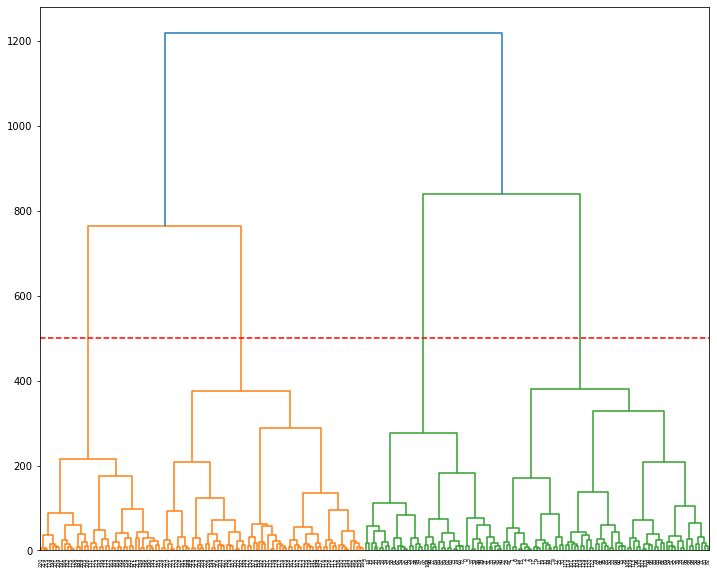

In [101]:
### plotting a dendogram to get count of clusters and it comes out to be 4
plt.figure(figsize=(12,10))
hc.dendrogram(hc.linkage(data2, method='ward'))
plt.axhline(y=500, color='r', linestyle='--')
plt.show();

In [102]:
agg_cluster= AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels_= agg_cluster.fit_predict(data2)
labels_

array([2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2,
       0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 3, 0, 3, 1, 1, 1, 1, 1, 0, 1, 3,
       1, 3, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3,
       3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1,
       3, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3,
       3, 1, 1, 1, 1, 1, 1], dtype=int64)

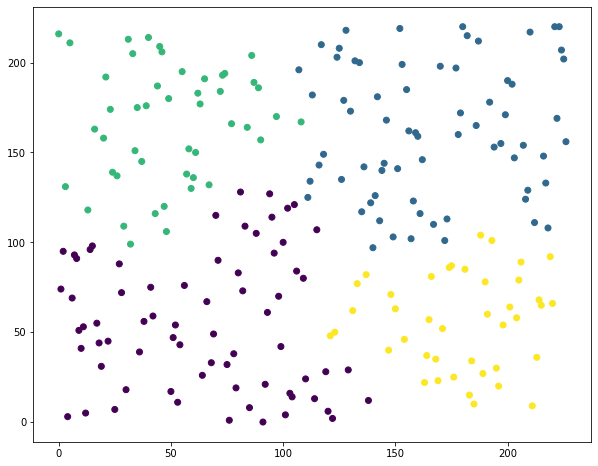

In [103]:
plt.figure(figsize=(10,8))
plt.scatter(data2['Country'], data2['Birthrate'], c=agg_cluster.labels_)

### <span style='color:red '>3.3 Clustering Countries on Deathrate </span>

In [116]:
data3=data1[['Country', 'Region', 'Deathrate']]
data3.head()

,Country,Region,Deathrate
0,0,0,190
1,1,3,35
2,2,6,21
3,3,8,4
4,4,10,61


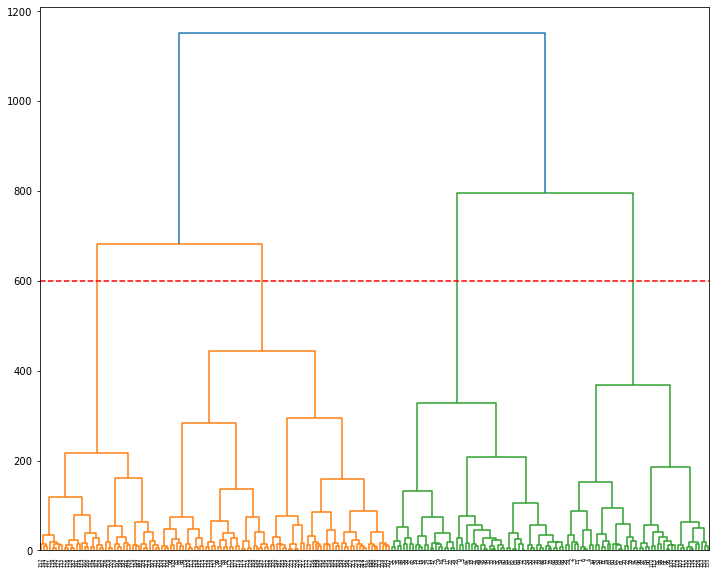

In [118]:
plt.figure(figsize=(12,10))
hc.dendrogram(hc.linkage(data3, method='ward'))
plt.axhline(y=600, color='r', linestyle='--')
plt.show();

In [119]:
agg_cluster= AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels_= agg_cluster.fit_predict(data3)
labels_

array([2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 3, 0, 0, 1, 3,
       0, 3, 0, 1, 1, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 1, 0, 0, 1,
       0, 1, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 3, 3,
       3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3,
       3, 0, 3, 0, 0, 0, 0], dtype=int64)

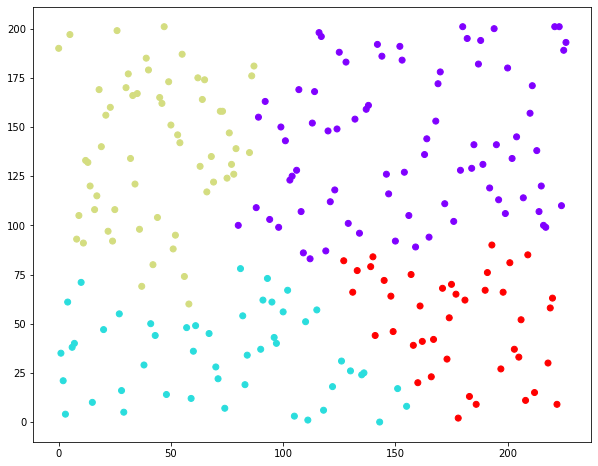

In [122]:
plt.figure(figsize=(10,8))
plt.scatter(data3['Country'], data3['Deathrate'], c=agg_cluster.labels_, cmap='rainbow')

### <span style='color:red '>3.4 Clustering Countries on Birthrate and Deathrate </span>

In [124]:
data4=data1[['Country', 'Birthrate', 'Deathrate']]
data4.head()

,Country,Birthrate,Deathrate
0,0,216,190
1,1,74,35
2,2,95,21
3,3,131,4
4,4,3,61


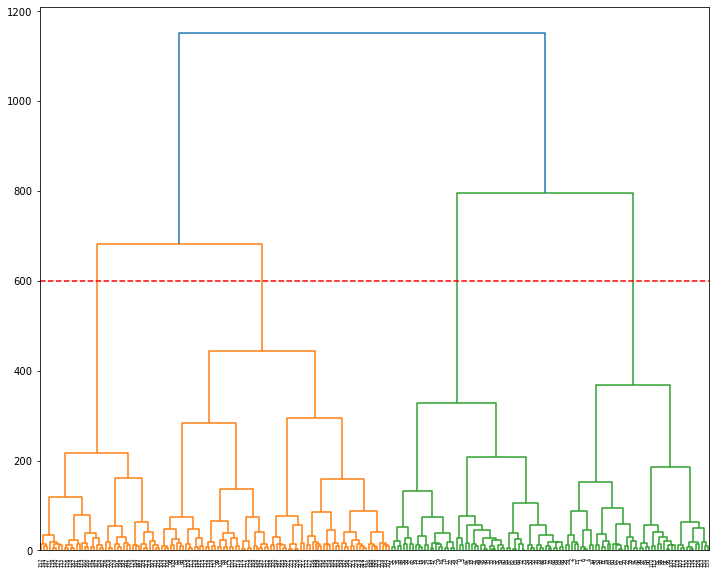

In [126]:
plt.figure(figsize=(12,10))
hc.dendrogram(hc.linkage(data3, method='ward'))
plt.axhline(y=600, color='r', linestyle='--')
plt.show();

In [127]:
agg_cluster= AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels_= agg_cluster.fit_predict(data4)
labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 1,
       2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 1, 2,
       2, 3, 2, 1, 2, 2, 1, 1, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1, 2, 3, 2,
       1, 2, 1, 3, 3, 2, 2, 3, 3, 3, 1, 1, 3, 1, 2, 2, 3, 2, 3, 1, 1, 3,
       2, 3, 1, 3, 3, 1, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 1, 2, 3, 3, 3, 3,
       3, 2, 1, 3, 1, 1, 3, 1, 2, 2, 2, 3, 1, 1, 2, 3, 1, 3, 1, 2, 2, 3,
       3, 1, 1, 3, 1, 3, 2, 3, 3, 1, 3, 1, 1, 2, 3, 2, 2, 2, 1, 1, 3, 3,
       3, 1, 3, 1, 1, 1, 1], dtype=int64)

In [131]:
px.scatter_3d(data_frame=data4, x='Country', y='Birthrate', z='Deathrate', color=agg_cluster.labels_)

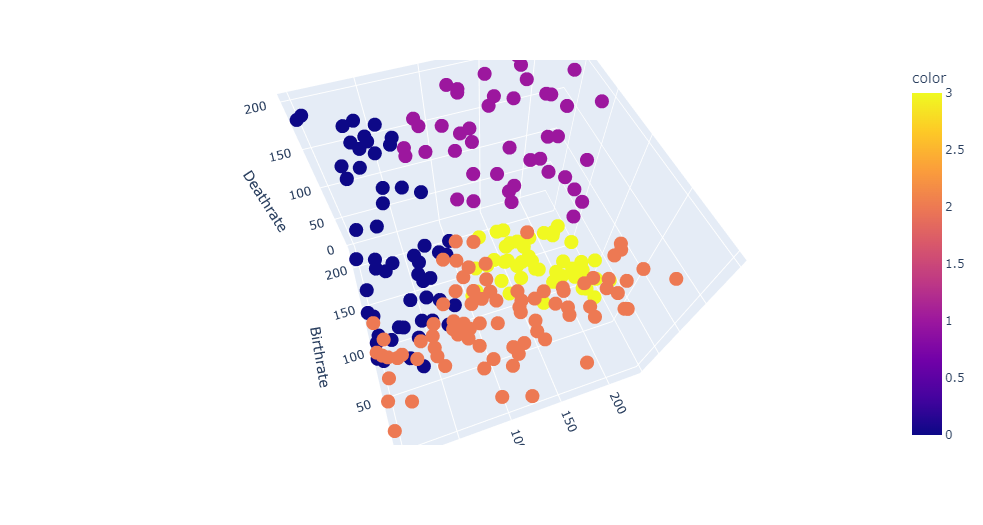

In [132]:
from IPython import display
display.Image("image1.png")